df[0]: 39.0  iniVal: 38.5
df[0]: 37.7  iniVal: 39.0


/tmp/ipykernel_18375/2590054291.py:77: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



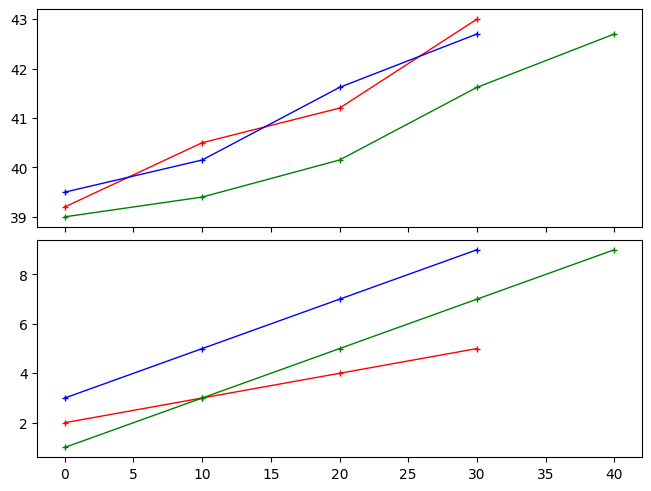

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def minimum(a, b):
    if a <= b:
        return a
    else:
        return b
def maximum(a, b):
    if a >= b:
        return a
    else:
        return b
def distance(a,b):
    return abs(a-b)

def compute_initial_common_value(datasets, key):
    initialValue = datasets[0][key][0]
    for df in datasets[1:]:
        print("df[0]:",df[key][0]," iniVal:", initialValue )
        initialValue = maximum(initialValue, df[key][0])
    return initialValue

def adjust_datasets(datasets, key, initialValue, margin):
    for df in datasets:
        for index, row in df.iterrows():
            if distance(row[key], initialValue) > distance(df.iloc[index+1][key], initialValue):
                df.drop(df.index[index], inplace=True)
            else:
                break

def rebase_datasets(datasets, key):
    offset = int(datasets[0][key].iloc[1] - datasets[0][key].iloc[0])
    for df in datasets:
        df[key] = range(0,len(df)*offset, offset)
        
########################################################

df1 = pd.DataFrame({
    'sec': [10, 20, 30, 40, 50],
    'skin': [38.5,39.2,40.5,41.2,43],
    'thermalState': ['fair', 'hot', 'critical', 'hell', 'death'],
    'gpuMs': [1, 2, 3, 4, 5]
})

df2 = pd.DataFrame({
    'sec': [10, 20, 30, 40, 50],
    'skin': [39,39.4,40.15,41.62, 42.7],
    'thermalState': ['fair', 'hot', 'critical', 'hell', 'death'],
    'gpuMs': [1, 3, 5, 7, 9]
})
df3 = pd.DataFrame({
    'sec': [10, 20, 30, 40, 50],
    'skin': [37.7,39.5,40.15,41.62, 42.7],
    'thermalState': ['fair', 'hot', 'critical', 'hell', 'death'],
    'gpuMs': [1, 3, 5, 7, 9]
})

key = "skin"
datasets = [ df1, df2, df3 ]
initialValue = compute_initial_common_value(datasets, key)
adjust_datasets(datasets, key, initialValue, 0.5)
rebase_datasets(datasets, "sec")
#for df in datasets:
#    print(df)

fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained', sharex=True)
xName = 'sec'
colors = ["red", "green", "blue", "brown"]

for df_index in range(0, len(datasets)):
    df = datasets[df_index]
    yName = 'skin'
    ax1.plot(xName, yName, data=df, color=colors[df_index], marker='+', linewidth=1, markersize=5, label='line1')
    yName = 'gpuMs'
    ax2.plot(xName, yName, data=df, color=colors[df_index], marker='+', linewidth=1, markersize=5, label='line1')


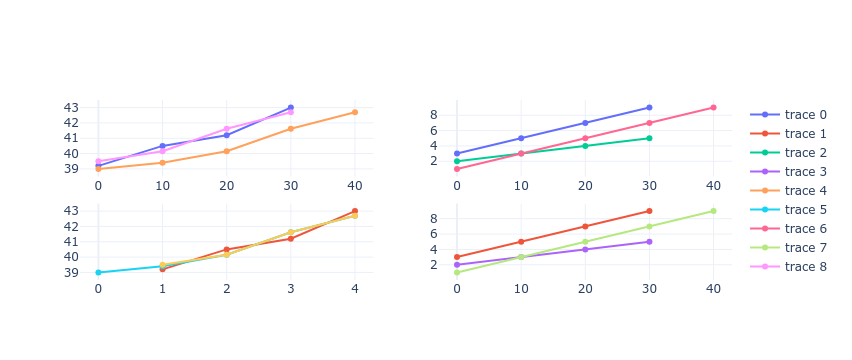

In [27]:
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# data
pio.templates.default = "plotly_white"
fig = make_subplots(rows=2, cols=2, shared_xaxes=False)

for df_index in range(0, len(datasets)):
    df = datasets[df_index]
    yName = 'skin'
    fig.add_trace(go.Scatter(x=df[xName], y=df[yName].values), row=1, col=1)
    fig.add_trace(go.Scatter(x=df[xName].index, y=df[yName].values), row=2, col=1)
    yName = 'gpuMs'
    fig.add_trace(go.Scatter(x=df[xName], y=df[yName].values), row=1, col=2)
    fig.add_trace(go.Scatter(x=df[xName], y=df[yName].values), row=2, col=2)
    ax2.plot(xName, yName, data=df, color=colors[df_index], marker='+', linewidth=1, markersize=5, label='line1')
fig.show()
